# FUZZY TIME SERIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('data time series.xlsx')
df

,Tahun,Produksi
0,1961,14367100.00
1,1962,16246900.00
2,1963,13952800.00
3,1964,16074600.00
4,1965,15339500.00
...,...,...
56,2017,84176015.00
57,2018,89454472.00
58,2019,74254033.00
59,2020,79336202.24


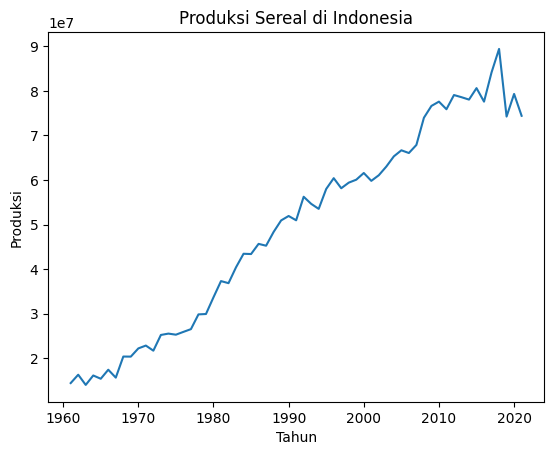

In [2]:
plt.plot(df.Tahun,df.Produksi)
plt.xlabel('Tahun')
plt.ylabel('Produksi')
plt.title("Produksi Sereal di Indonesia")
plt.show()

In [3]:
# Mencari tahu tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tahun     61 non-null     int64  
 1   Produksi  61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
# Mencari tahu apakah terdapat data yang hilang
df.isnull().sum()

Tahun       0
Produksi    0
dtype: int64

# Step 1 : Define the universe of discourse and partition it into equally lengthy invervals

In [5]:
#Find maximum and minimum value of the production
U_max = df['Produksi'].max()
U_min = df['Produksi'].min()

print(f"U_min = {U_min}")
print(f"U_max = {U_max}")

#D1 = float(input("Masukkan D1 : "))
#D2 = float(input("Masukkan D2 : "))
D1 = 952800
D2 = 545528
#Define the universe of discourse
U = pd.Interval(U_min-D1,U_max+D2,closed='both')
print(f"U = {U}")

#Determine the number of classes that would be used by sturgess rule
n = round(1 + 3.322*np.log10(len(df)))
print(f"The number of class would be used = {n}")
#length of interval
l = U.length/n
print(f"length of each interval = {l}")

#partitioning the interval with equally lengthy
u = []
row_name=[]
lb = U.left
for i in range(n) :
    rb = lb+l
    u.append(pd.Interval(lb,rb,closed='both'))
    row_name.append('u'+str(i+1))
    lb = rb
u

df_u = pd.DataFrame(data=u,index=row_name,columns=['Interval'])
df_u

U_min = 13952800.0
U_max = 89454472.0
U = [13000000.0, 90000000.0]
The number of class would be used = 7
length of each interval = 11000000.0


,Interval
u1,"[13000000.0, 24000000.0]"
u2,"[24000000.0, 35000000.0]"
u3,"[35000000.0, 46000000.0]"
u4,"[46000000.0, 57000000.0]"
u5,"[57000000.0, 68000000.0]"
u6,"[68000000.0, 79000000.0]"
u7,"[79000000.0, 90000000.0]"


# Step 2 : Define fuzzy sets on the universe of discourse

In [6]:
A = np.zeros((n,n))
coloumn_name = row_name
row_name = []
for i in range(n) :
    row_name.append('A'+str(i+1))
    if i==0 :
        A[i][0] = 1
        A[i][1] = 0.5
    elif i==n-1 :
        A[i][n-1] = 1
        A[i][n-2] = 0.5
    elif 0<i<n-1 :
        A[i][i] = 1
        A[i][i-1] = A[i][i+1] = 0.5

fs = pd.DataFrame(data=A,columns=coloumn_name,index=row_name)
fs

,u1,u2,u3,u4,u5,u6,u7
A1,1.0,0.5,0.0,0.0,0.0,0.0,0.0
A2,0.5,1.0,0.5,0.0,0.0,0.0,0.0
A3,0.0,0.5,1.0,0.5,0.0,0.0,0.0
A4,0.0,0.0,0.5,1.0,0.5,0.0,0.0
A5,0.0,0.0,0.0,0.5,1.0,0.5,0.0
A6,0.0,0.0,0.0,0.0,0.5,1.0,0.5
A7,0.0,0.0,0.0,0.0,0.0,0.5,1.0


# Step 3 : Fuzzify historical data

In [7]:
interval = []
fuzzy_produk = []
for i in range(len(df)) : 
    for j in u :
        if df['Produksi'][i] in j :
            interval.append(j)
            index = u.index(j)
            fuzzy_produk.append(fs[fs['u'+str(index+1)]==fs['u'+str(index+1)].max()].index.values[0])
df = df.assign(Interval=interval,Fuzzified_Produksi=fuzzy_produk)
df

,Tahun,Produksi,Interval,Fuzzified_Produksi
0,1961,14367100.00,"[13000000.0, 24000000.0]",A1
1,1962,16246900.00,"[13000000.0, 24000000.0]",A1
2,1963,13952800.00,"[13000000.0, 24000000.0]",A1
3,1964,16074600.00,"[13000000.0, 24000000.0]",A1
4,1965,15339500.00,"[13000000.0, 24000000.0]",A1
...,...,...,...,...
56,2017,84176015.00,"[79000000.0, 90000000.0]",A7
57,2018,89454472.00,"[79000000.0, 90000000.0]",A7
58,2019,74254033.00,"[68000000.0, 79000000.0]",A6
59,2020,79336202.24,"[79000000.0, 90000000.0]",A7


# Step 4 : Identify fuzzy relationships

In [8]:
flr = []
for i in range(len(df)-1) :
    left = fuzzy_produk[i]
    right = fuzzy_produk[i+1]
    flr.append(left+' ==> '+right)
pd.DataFrame(data=np.unique(flr),columns=['Fuzzy Relationships'])

,Fuzzy Relationships
0,A1 ==> A1
1,A1 ==> A2
2,A2 ==> A2
3,A2 ==> A3
4,A3 ==> A3
5,A3 ==> A4
6,A4 ==> A4
7,A4 ==> A5
8,A5 ==> A5
9,A5 ==> A6


# Step 5 : Establish fuzzy relationships groups (FLRG's)

In [9]:
flrg = []
temp = []
for i in row_name :
    for j in np.unique(flr) :
        if j[0:2] == i :
            temp.append(j[7:9])
    flrg.append(i+' ==> '+(', '.join(temp)))
    temp=[]    
row_name1 = []
for i in range(len(row_name)) :
    row_name1.append('Group '+str(i+1))
pd.DataFrame(data=flrg,columns=['FLRG'], index=row_name1)

,FLRG
Group 1,"A1 ==> A1, A2"
Group 2,"A2 ==> A2, A3"
Group 3,"A3 ==> A3, A4"
Group 4,"A4 ==> A4, A5"
Group 5,"A5 ==> A5, A6"
Group 6,"A6 ==> A6, A7"
Group 7,"A7 ==> A6, A7"


# Step 6 : Defuzzify the forecast output

In [10]:
#Masih manual caranya
forecast = [None]
interval_midpoint = []
flrg1 = []
for i in range(1,len(df)) :
    if df.Fuzzified_Produksi[i-1] == 'A1' :
        m1 = u[0].mid
        m2 = u[1].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[0])
    elif df.Fuzzified_Produksi[i-1] == 'A2' :
        m1 = u[1].mid
        m2 = u[2].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[1])
    elif df.Fuzzified_Produksi[i-1] == 'A3' :
        m1 = u[2].mid
        m2 = u[3].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[2])
    elif df.Fuzzified_Produksi[i-1] == 'A4' :
        m1 = u[3].mid
        m2 = u[4].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[3])
    elif df.Fuzzified_Produksi[i-1] == 'A5' :
        m1 = u[4].mid
        m2 = u[5].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[4])
    elif df.Fuzzified_Produksi[i-1] == 'A6' :
        m1 = u[5].mid
        m2 = u[6].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[5])
    elif df.Fuzzified_Produksi[i-1] == 'A7' :
        m1 = u[5].mid
        m2 = u[6].mid
        forecast.append(np.average([m1,m2]))
        interval_midpoint.append(str(m1)+';'+str(m2))
        flrg1.append(flrg[6])
flrg1.append(None)
interval_midpoint.append(None)

df1 = pd.DataFrame({'Tahun' : df['Tahun'],
                    'Produksi Aktual' : df['Produksi'],
                    'Forecasted Value': forecast,
                    'FLRG' : flrg1, 
                    'Interval Midpoint' : interval_midpoint})
df1



,Tahun,Produksi Aktual,Forecasted Value,FLRG,Interval Midpoint
0,1961,14367100.00,NaN,"A1 ==> A1, A2",18500000.0;29500000.0
1,1962,16246900.00,24000000.0,"A1 ==> A1, A2",18500000.0;29500000.0
2,1963,13952800.00,24000000.0,"A1 ==> A1, A2",18500000.0;29500000.0
3,1964,16074600.00,24000000.0,"A1 ==> A1, A2",18500000.0;29500000.0
4,1965,15339500.00,24000000.0,"A1 ==> A1, A2",18500000.0;29500000.0
...,...,...,...,...,...
56,2017,84176015.00,79000000.0,"A7 ==> A6, A7",73500000.0;84500000.0
57,2018,89454472.00,79000000.0,"A7 ==> A6, A7",73500000.0;84500000.0
58,2019,74254033.00,79000000.0,"A6 ==> A6, A7",73500000.0;84500000.0
59,2020,79336202.24,79000000.0,"A7 ==> A6, A7",73500000.0;84500000.0


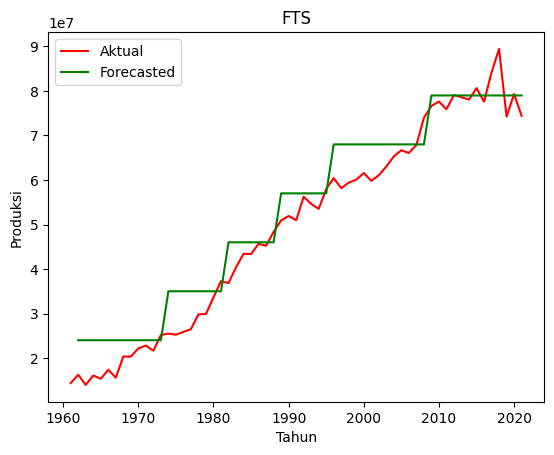

In [11]:
plt.plot(df.Tahun,df.Produksi , color='r', label='Aktual')
plt.plot(df.Tahun, df1['Forecasted Value'], color='g', label='Forecasted')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Tahun")
plt.ylabel("Produksi")
plt.title("FTS")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()